Downloaded vtest.avi successfully!


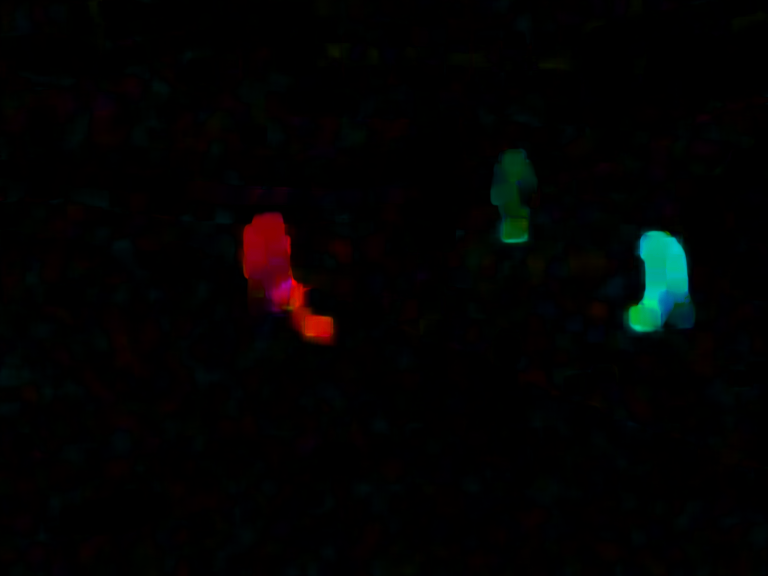

Displayed frame 1


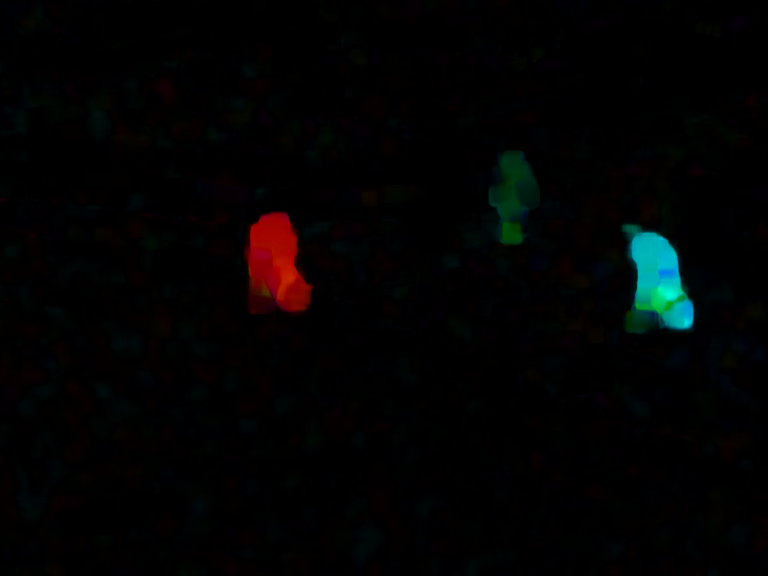

Displayed frame 2


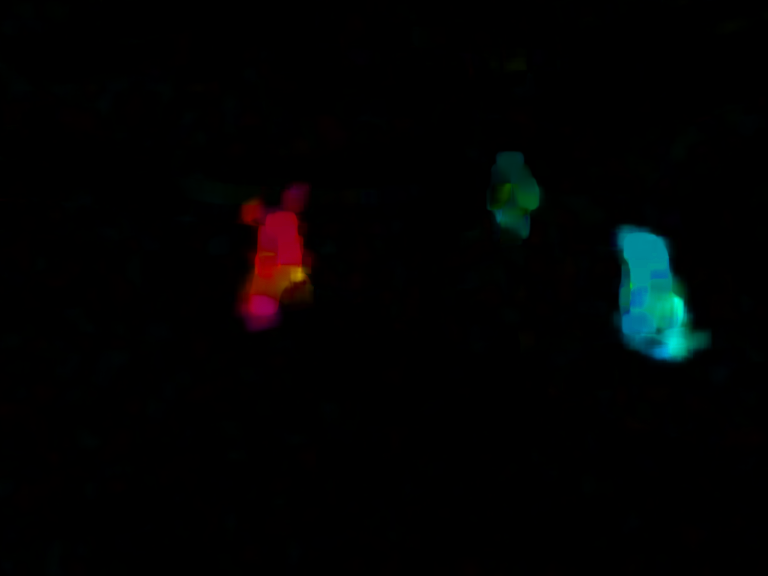

Displayed frame 3


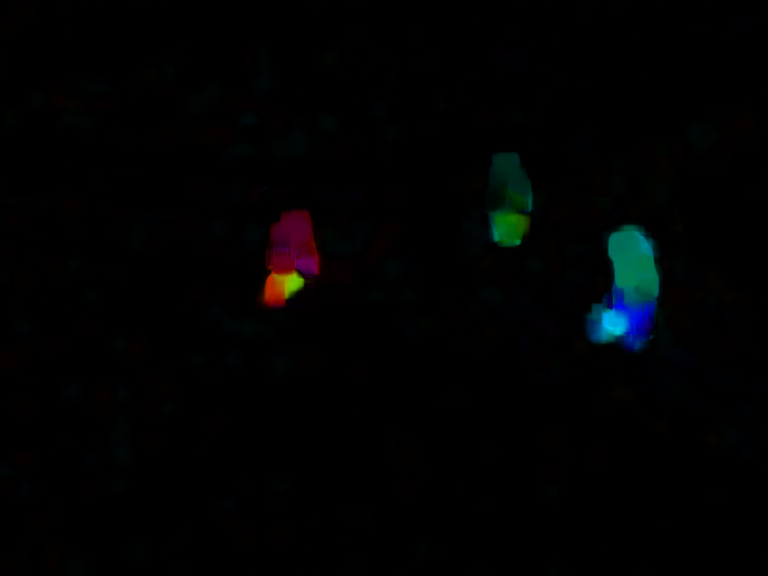

Displayed frame 4


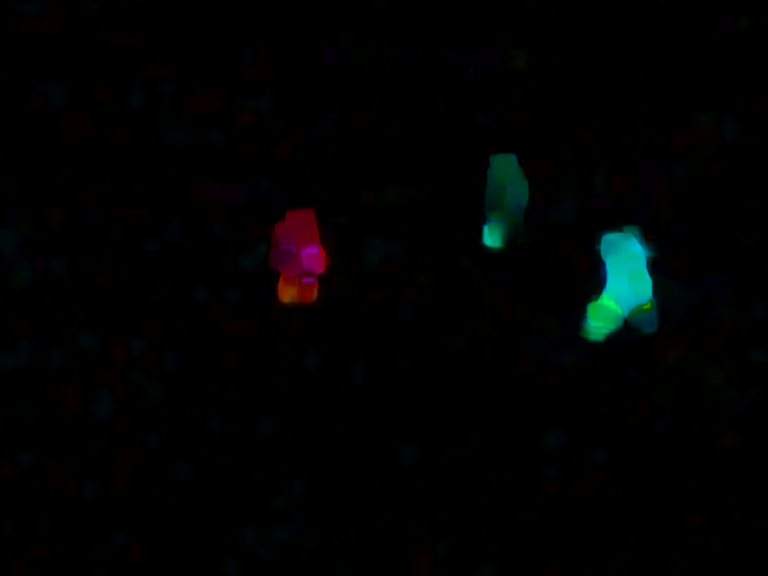

Displayed frame 5


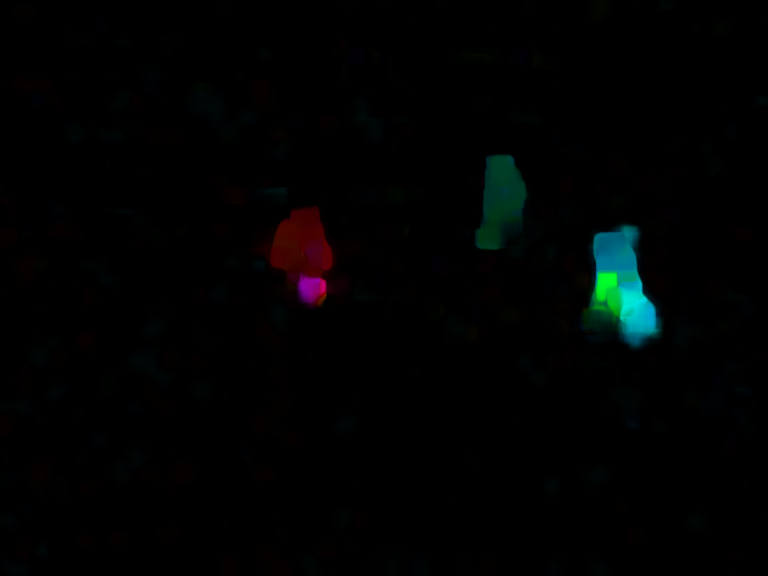

Displayed frame 6


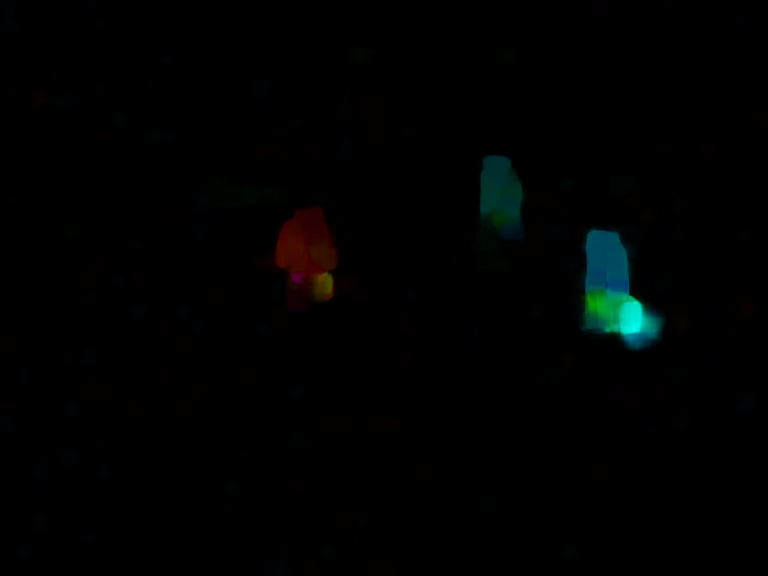

Displayed frame 7


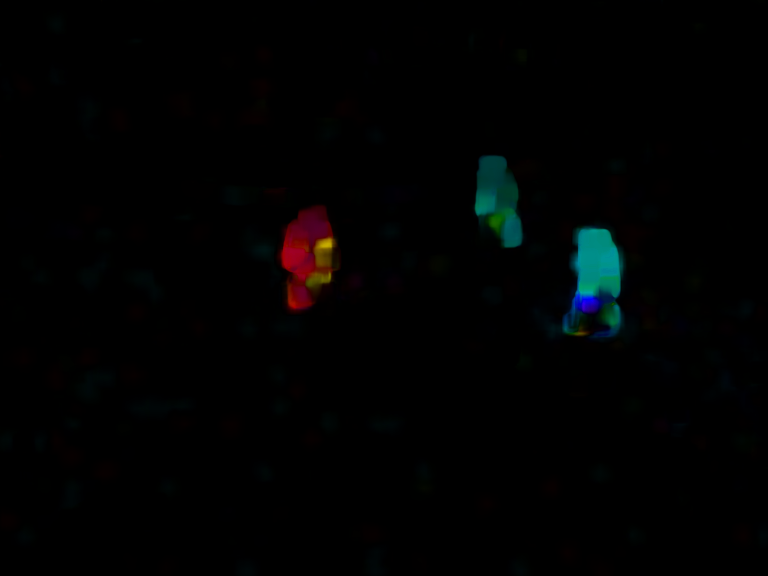

Displayed frame 8


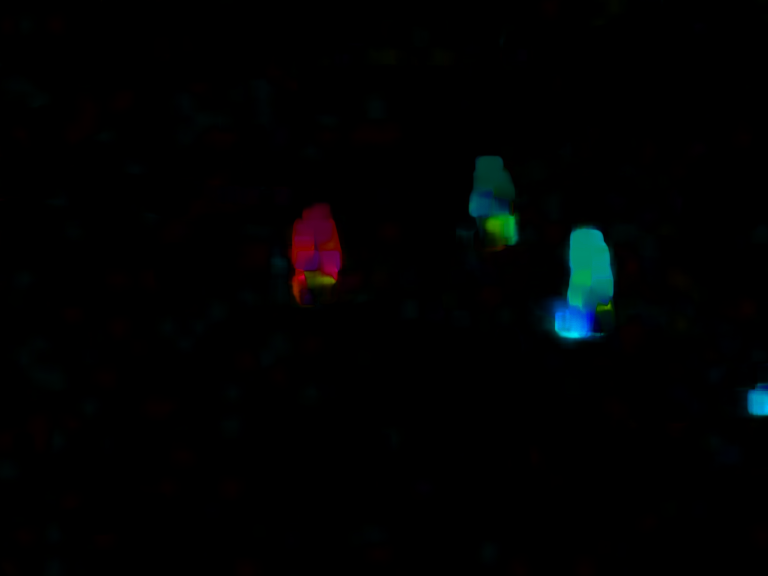

Displayed frame 9


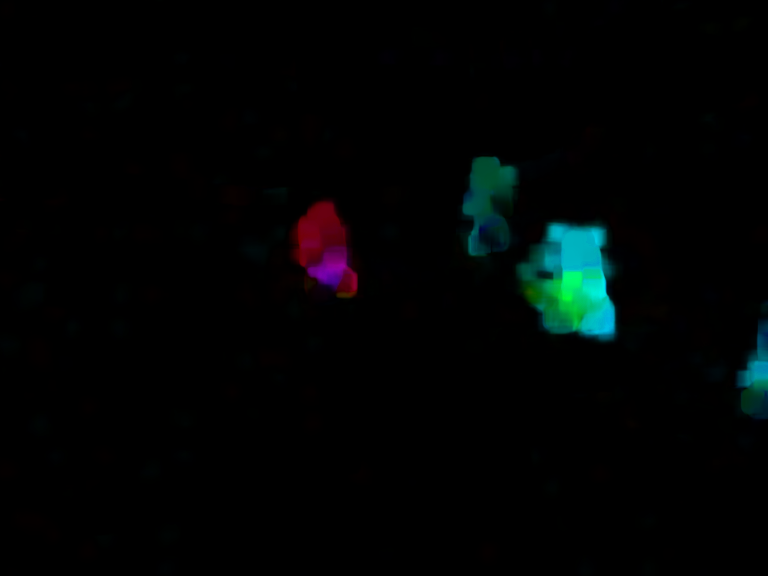

Displayed frame 10
Finished optical flow demo.


In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import urllib.request

# Step 1: Download sample video (if not already)
url = "https://github.com/opencv/opencv/raw/master/samples/data/vtest.avi"
urllib.request.urlretrieve(url, "vtest.avi")
print("Downloaded vtest.avi successfully!")

# Step 2: Read video
cap = cv2.VideoCapture('vtest.avi')
ret, frame1 = cap.read()
if not ret:
    print("Error: Unable to read video.")
    cap.release()
    exit()

# Step 3: Convert first frame to grayscale
prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

# Step 4: Prepare HSV image for visualization
hsv = np.zeros_like(frame1)
hsv[..., 1] = 255

# Step 5: Process limited frames (for Colab)
frame_count = 0
while frame_count < 10:  # limit to 10 frames for demo
    ret, frame2 = cap.read()
    if not ret:
        break

    next_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Compute dense optical flow
    flow = cv2.calcOpticalFlowFarneback(
        prvs, next_gray, None,
        pyr_scale=0.5, levels=3, winsize=15,
        iterations=3, poly_n=5, poly_sigma=1.2, flags=0
    )

    # Convert flow to magnitude and angle
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    # HSV visualization
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    # ✅ Use cv2_imshow instead of cv2.imshow
    cv2_imshow(bgr)
    print(f"Displayed frame {frame_count+1}")
    frame_count += 1

    prvs = next_gray

cap.release()
print("Finished optical flow demo.")